### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets.

### Clustering with California Housing Dataset
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [3]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool

In [4]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [5]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [6]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

In [7]:
min_housing_age = housing_df['HouseAge'].min()
max_housing_age = housing_df['HouseAge'].min()


print('range housing age', min_housing_age, max_housing_age)
print('range of median income', housing_df['MedInc'].min(),  ':', housing_df['MedInc'].max())
print('range of occupancy', housing_df['AveOccup'].min(),':', housing_df['AveOccup'].max())
print(housing_df['Population'].plot)

import seaborn as sns
import matplotlib.pyplot as plt


range housing age 1.0 1.0
range of median income 0.4999 : 15.0001
range of occupancy 0.6923076923076923 : 1243.3333333333333


Text(0, 0.5, 'AveBedrms')

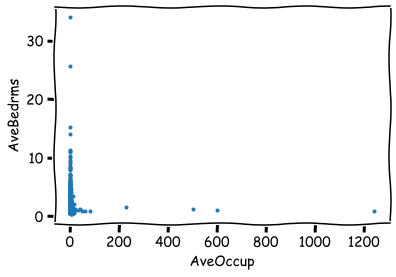

In [8]:
plt.xkcd()
fig, ax = plt.subplots()

plt.scatter(housing_df['AveOccup'], housing_df['AveBedrms'], marker = '.')
plt.xlabel('AveOccup')
plt.ylabel('AveBedrms')

Text(0, 0.5, 'AveRooms')

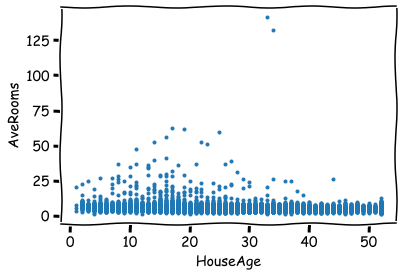

In [9]:
plt.scatter(housing_df['HouseAge'], housing_df['AveRooms'], marker = '.')
plt.xlabel('HouseAge')
plt.ylabel('AveRooms')

Text(0, 0.5, 'AveOccup')

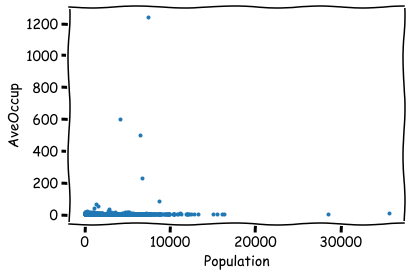

In [10]:
plt.scatter(housing_df['Population'], housing_df['AveOccup'], marker = '.')
plt.xlabel('Population')
plt.ylabel('AveOccup')

### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

Text(0, 0.5, 'Latitude')

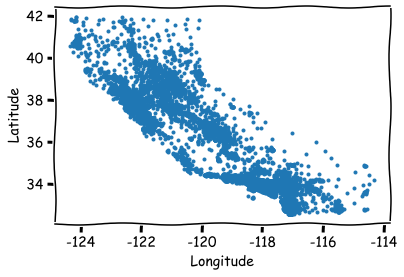

In [11]:

plt.scatter(housing_df['Longitude'], housing_df['Latitude'], marker = '.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [12]:
lat_lon_df = pd.concat([housing_df['Latitude'], housing_df['Longitude']], axis =1) #as a reminder: axis = 1 is concat vertically (column), axis = 0 is concat horizontally (row)
lat_lon_df.head(5)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(lat_lon_df)

kmeans.predict(lat_lon_df)



array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [13]:
cluster_centers = kmeans.cluster_centers_
clust2 = kmeans.labels_
reg2 = {0,1}
print(cluster_centers)
print(clust2)
print(reg2, type(reg2))

[[  33.94160197 -118.00855111]
 [  37.9580601  -121.71822243]]
[1 1 1 ... 1 1 1]
{0, 1} <class 'set'>


array([[  33.94126851, -118.00789306],
       [  37.95713201, -121.7178467 ]])

{0, 1}

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/reg2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

In [14]:
lat_lon_df['clust2'] = clust2
lat_lon_df.head(5)

,Latitude,Longitude,clust2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1


No handles with labels found to put in legend.


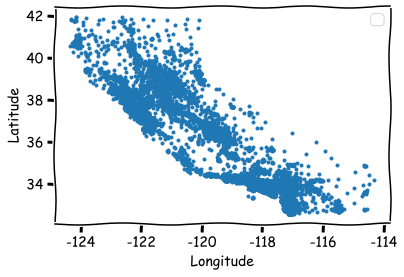

In [15]:
fig, ax = plt.subplots()

ax.scatter(lat_lon_df['Longitude'], lat_lon_df['Latitude'], marker = '.')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()



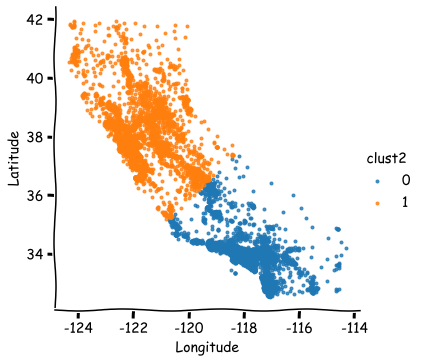

In [16]:
sns.lmplot(data = lat_lon_df, x = 'Longitude', y = 'Latitude', hue = 'clust2', markers = '.', fit_reg = False, legend = True, legend_out = True)

,Latitude,Longitude,reg2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

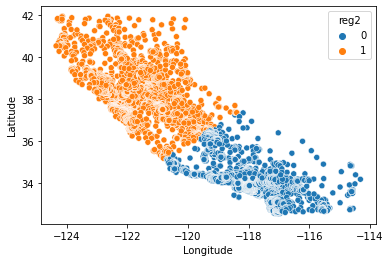

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [17]:
housing_df['clust2'] = lat_lon_df['clust2']
housing_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,clust2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


In [20]:
new_df = [pd.DataFrame(y) for x, y in housing_df.groupby('clust2', as_index=False)]
so_cal_df= new_df[0]
no_cal_df= new_df[1]

so_cal_df = pd.DataFrame(so_cal_df)
no_cal_df = pd.DataFrame(no_cal_df)

print(new_df[0].count)
print(type(new_df))

<bound method DataFrame.count of        MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2398   3.7857      19.0  20.200000   4.050000       187.0  2.337500     36.79   
2665   1.8793      38.0   5.744589   1.134199       784.0  3.393939     33.12   
2666   2.1630      18.0   4.383399   1.118577      1006.0  3.976285     33.13   
2667   2.1010      21.0   4.413793   0.939655       890.0  3.836207     33.12   
2668   1.0000      33.0   4.140940   1.251678       777.0  2.607383     33.19   
...       ...       ...        ...        ...         ...       ...       ...   
20502  2.9821      45.0   4.481481   0.925926        67.0  2.481481     34.33   
20503  8.2787      27.0   6.935065   1.103896       243.0  3.155844     34.33   
20504  7.3550      11.0   7.248670   0.978723      2526.0  3.359043     34.29   
20505  6.0368      22.0   6.611336   1.070850      1595.0  3.228745     34.29   
20506  6.9454       8.0   6.873103   1.040000      2510.0  3.462069     34.2

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

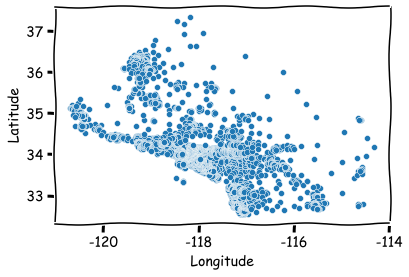

In [65]:
sns.scatterplot(data= so_cal_df, x = 'Longitude', y = 'Latitude', markers = '.')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

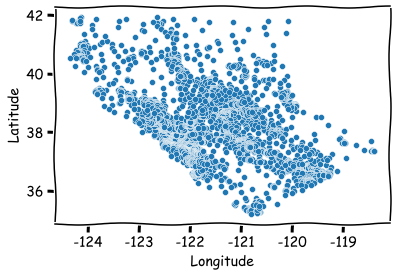

In [66]:
sns.scatterplot(data= no_cal_df, x = 'Longitude', y = 'Latitude', markers = '.')

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [67]:
print('NO CALI median house value:', no_cal_df['MedHouseVal'].median())
print('SO CALI median house value:', so_cal_df['MedHouseVal'].median())

NO CALI median house value: 1.655
SO CALI median house value: 1.858


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

In [88]:
so_cal_df_new = pd.concat([so_cal_df['MedHouseVal'],so_cal_df['Latitude'], so_cal_df['Longitude']], axis = 1)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(so_cal_df_new)

kmeans.predict(so_cal_df_new)

array([1, 0, 0, ..., 2, 1, 1], dtype=int32)

In [89]:
cluster_centers_so = kmeans.cluster_centers_
clust2_so = kmeans.labels_

print(cluster_centers_so)
print(clust2_so)

[[   1.42237237   33.34500924 -117.03246768]
 [   1.75306365   34.19292228 -118.31798816]
 [   3.97261697   33.90336419 -118.22465191]]
[1 0 0 ... 2 1 1]


In [90]:
so_cal_df_new['clust2'] = clust2_so
so_cal_df_new.head(5)

,MedHouseVal,Latitude,Longitude,clust2
2398,0.786,36.79,-118.91,1
2665,0.608,33.12,-115.52,0
2666,0.534,33.13,-115.52,0
2667,0.467,33.12,-115.51,0
2668,0.400,33.19,-115.46,0


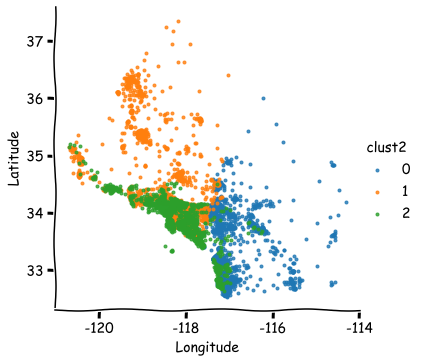

In [91]:
sns.lmplot(data = so_cal_df_new, x = 'Longitude', y = 'Latitude', hue = 'clust2', markers = '.', fit_reg = False, legend = True, legend_out = True)

In [92]:
so_cal_clusters = [pd.DataFrame(y) for x, y in so_cal_df_new.groupby('clust2', as_index=False)]
so_cal_0= so_cal_clusters[0]
so_cal_1= so_cal_clusters[1]
so_cal_2= so_cal_clusters[2]


so_cal_0 = pd.DataFrame(so_cal_0)
so_cal_1 = pd.DataFrame(so_cal_1)
so_cal_2 = pd.DataFrame(so_cal_2)

In [93]:
print('Cluster 0 median:', so_cal_0['MedHouseVal'].median())
print('Cluster 1 median:', so_cal_1['MedHouseVal'].median())
print('Cluster 2 median:', so_cal_2['MedHouseVal'].median())

Cluster 0 median: 1.342
Cluster 1 median: 1.763
Cluster 2 median: 3.776


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

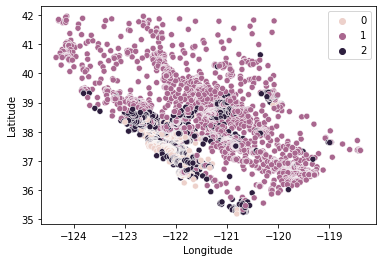

In [23]:
###BELOW IS OUTPUT FROM ORIGINAL (NOT MINE)

<ipython-input-24-8c6bada43c5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_cal_df['hi_med_lo'] = hi_med_lo


In [25]:
print(f"Clust 0 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==0].median()}")
print(f"Clust 1 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==1].median()}")
print(f"Clust 2 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==2].median()}")

Clust 0 median house value: 4.043
Clust 1 median house value: 1.042
Clust 2 median house value: 2.3535000000000004


### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

In [54]:
lat_lon_df_full = lat_lon_df.drop(['clust2'], axis = 1)

kmeans_full = KMeans(n_clusters = 4)
kmeans_full.fit(lat_lon_df_full)

kmeans_full.predict(lat_lon_df_full)


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [55]:
cluster_centers_full = kmeans_full.cluster_centers_
clustr = kmeans_full.labels_

print(cluster_centers_full)
print(clustr)
print(np.unique(clustr))


[[  34.02053227 -118.14367709]
 [  38.11725343 -121.93695832]
 [  36.16824042 -119.73628339]
 [  33.05834867 -116.94029439]]
[1 1 1 ... 1 1 1]
[0 1 2 3]


In [56]:
lat_lon_df_full['clustr'] = clustr
print(lat_lon_df_full)


       Latitude  Longitude  clustr
0         37.88    -122.23       1
1         37.86    -122.22       1
2         37.85    -122.24       1
3         37.85    -122.25       1
4         37.85    -122.25       1
...         ...        ...     ...
20635     39.48    -121.09       1
20636     39.49    -121.21       1
20637     39.43    -121.22       1
20638     39.43    -121.32       1
20639     39.37    -121.24       1

[20640 rows x 3 columns]


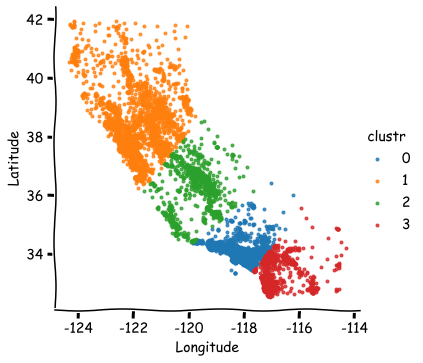

In [57]:
sns.lmplot(data = lat_lon_df_full, x = 'Longitude', y = 'Latitude', hue = 'clustr', markers = '.', fit_reg = False, legend = True, legend_out = True)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

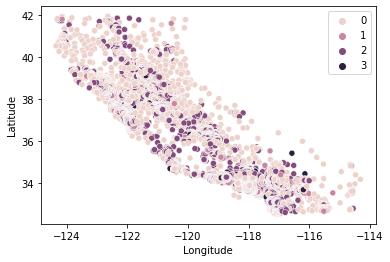

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
